# Unsupervised and Supervised Learning on Iris Dataset

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load iris data set;this will be a classification problem since the response(which type of iris flower) is categorical
iris = load_iris()

In [3]:
iris.data.shape

(150, 4)

In [4]:
type(iris.data)

numpy.ndarray

In [5]:
iris.data[:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [6]:
iris.target.shape

(150,)

In [7]:
type(iris.target)

numpy.ndarray

In [8]:
#so we have 150 rows and four columns for the four features of the iris flower
#The class of each observation is stored in the .target attribute of the dataset(ie.the three species of the iris flower) 
#This is an integer 1D array of length n_samples:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## First we will utilize kmeans clustering which is an unsupervised clustering algorithm in which "K" represents the number of clusters utilized to learn from the data.

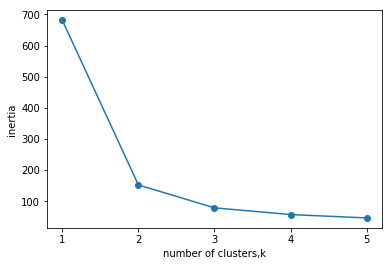

In [9]:
#utilize for loop and kmeans to determine elbow and ideal number of clusters for iris data set 
ks = range(1,6)
inertias = []
for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(iris.data)
    inertias.append(model.inertia_)
plt.plot(ks,inertias,'-o')
plt.xlabel('number of clusters,k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

### the above plot shows the elbow at 3, so we could choose k = 3

In [10]:
model = KMeans(n_clusters = 3)
labels = model.fit_predict(iris.data)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [11]:
iris.species = pd.Categorical.from_codes(iris.target, iris.target_names)

In [12]:
df = pd.DataFrame({'labels':labels, 'species':iris.species})
print(df.head())

   labels species
0       1  setosa
1       1  setosa
2       1  setosa
3       1  setosa
4       1  setosa


In [13]:
#cross tabulating should show us which species lies within which cluster label
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species  setosa  versicolor  virginica
labels                                
0             0          48         14
1            50           0          0
2             0           2         36


### This shows the kmeans model did a nice job of predicting the two species of the iris flower.

## Now we will switch to KNN classifier which is a supervised learning model that classifies data based on neighboring data.

In [14]:
#store feature matrix in X and response vector in y, make sure both are numpy array 
X = iris.data
y = iris.target
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [15]:
#now import necessary module to perform KNN classification on iris dataset
from sklearn.neighbors import KNeighborsClassifier

In [16]:
#now instantiate the estimator(KNN model) utilizing knn object
knn = KNeighborsClassifier(n_neighbors=1)

In [17]:
#fit the model with data in order to learn the relationship between X and y
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [18]:
#model will use the info it learned during model training process and predict response of new observation
knn.predict([[3,5,4,2]])

array([2])

In [19]:
#will return a new numpy array from the two observations provided with four features each
X_new = [[3,5,4,2],[5,4,3,2]]
knn.predict(X_new)

array([2, 1])

### So above, the prediction for first unknown iris was (2) and prediction for second unknown iris was (1).

## Now try a different value of K

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
knn.predict(X_new)

array([1, 1])

### So above, the prediction for the first unknown iris was (1) and the prediction for the second was (1).

## Now we will try a Logistic Regression Model which is also a supervised machine learning model that predicts a response based on the relationship between the dependent and independent variable.

In [21]:
from sklearn.linear_model import LogisticRegression
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
logreg = LogisticRegression()
logreg.fit(X,y)
logreg.predict(X_new)

array([2, 0])

### So above, the prediction for the first unknown iris was (2) and the prediction for the second was (0).

In [22]:
#store the predicted response values and check how many predictions were generated
logreg.predict(X)
y_pred = logreg.predict(X)
len(y_pred)

150

In [23]:
#computer classification accuracy for the regression model
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.96


### This means there is 96%training accuracy when you train and test the model on the same data.

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


### This means there is 100% training accuracy when you utilize the KNN classifier which makes sense since you are using the same dataset to train and test therefore we will next evaluate a train/test split.

In [25]:
#train the model on the training set, test the model on the testing set and then test the model for accuracy 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


## Utilize cross-validation on knn model to test model and tune hyperparameters, also compare to Logistic Regression model

In [29]:
#cross validation reduces variance
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [31]:
print(scores.mean())

0.9666666666666668


In [46]:
#search for an optimal value of k for knn
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'Cross-Validation accuracy')

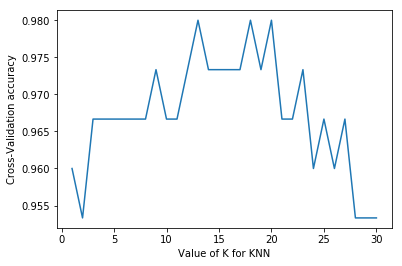

In [43]:
#plot value of k for KNN vs cross-validation accuracy
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range,k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validation accuracy")

In [47]:
#compare best KNN model with logistic regression on iris dataset;10-fold cross validation w/ best knn model
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn,X,y,cv=10,scoring='accuracy').mean())    

0.9800000000000001


In [49]:
#compare with logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg,X,y,cv=10,scoring='accuracy').mean()) 

0.9533333333333334
